In [1]:
from utils import setrootdir
setrootdir("ppgcc-coautorias")

'Directory ppgcc-coautorias successfully loaded as current working directory.'

In [2]:
import os
import pickle
from pathlib import Path
from itertools import combinations, chain
from collections import Counter

from collections import Counter
from itertools import combinations
from pathlib import Path

from dotenv import load_dotenv

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

import seaborn as sns
import plotly.graph_objects as go

import holoviews as hv
from bokeh.io.export import export_png, export_svgs

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

from src.utils import get_colors, combine_rgb

sns.set_style("whitegrid")


from src.visualization import Visualizer, generate_labels

In [3]:
load_dotenv()

DATASET_DIRECTORY = os.getenv("DATASET_DIRECTORY")
METADATA_FILE = os.getenv("METADATA_FILE")

# 3. Visualization

In [4]:
visualizer = Visualizer(
    data_dir=DATASET_DIRECTORY,
    metadata_file=METADATA_FILE,
    step_directory="04-visualization"
)

In [5]:
df_productions = visualizer.read_parquet(step="02-preprocessing", name="productions")
df_productions

,production_id,name,citation,lattes_id,institution,production,authors,location,type,year,issn
0,0,Jose Maria Nazar David,"[Jose Maria Nazar David, MARIA DAVID, JOSÉ, DA...",3640497501056163,UFJF,Designing collaboration through a web-based gr...,Jose Maria Nazar David,International Journal of Computer Applications...,PERIODICO,2004,09528091
1,0,Jose Maria Nazar David,"[Jose Maria Nazar David, MARIA DAVID, JOSÉ, DA...",3640497501056163,UFJF,Designing collaboration through a web-based gr...,Marcos Roberto da Silva Borges,International Journal of Computer Applications...,PERIODICO,2004,09528091
2,1,Jose Maria Nazar David,"[Jose Maria Nazar David, MARIA DAVID, JOSÉ, DA...",3640497501056163,UFJF,Supporting Awareness in Groupware through an A...,Rita Suzana Pitangueira Maciel,JOURNAL OF UNIVERSAL COMPUTER SCIENCE,PERIODICO,2009,0948695X
3,1,Jose Maria Nazar David,"[Jose Maria Nazar David, MARIA DAVID, JOSÉ, DA...",3640497501056163,UFJF,Supporting Awareness in Groupware through an A...,Jose Maria Nazar David,JOURNAL OF UNIVERSAL COMPUTER SCIENCE,PERIODICO,2009,0948695X
4,1,Jose Maria Nazar David,"[Jose Maria Nazar David, MARIA DAVID, JOSÉ, DA...",3640497501056163,UFJF,Supporting Awareness in Groupware through an A...,Michel Oei,JOURNAL OF UNIVERSAL COMPUTER SCIENCE,PERIODICO,2009,0948695X
...,...,...,...,...,...,...,...,...,...,...,...
936713,230929,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, Leandro Santiago,...",6358983442870515,UFF,Gerando base de grafos não isomorfos com seus ...,Luís Felipe Ignácio Cunha,SBPO 2023: Simpósio Brasileiro de Pesquisa Ope...,CONFERENCIA,2023,None
936714,230930,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, Leandro Santiago,...",6358983442870515,UFF,Paralelismo e Heurísticas para o problema da m...,Thiago Lopes Nascimento,SBPO 2023: Simpósio Brasileiro de Pesquisa Ope...,CONFERENCIA,2023,None
936715,230930,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, Leandro Santiago,...",6358983442870515,UFF,Paralelismo e Heurísticas para o problema da m...,Fábio Protti,SBPO 2023: Simpósio Brasileiro de Pesquisa Ope...,CONFERENCIA,2023,None
936716,230930,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, Leandro Santiago,...",6358983442870515,UFF,Paralelismo e Heurísticas para o problema da m...,Luís Felipe Ignácio Cunha,SBPO 2023: Simpósio Brasileiro de Pesquisa Ope...,CONFERENCIA,2023,None


## 3.1. PPGCC data between 2014-2023

## 3.2. Yearly publications

### 3.2.1. Yearly publications by institution

In [6]:
df_yearly_publications = visualizer.frame_yearly_publications(
    df_productions,
    start_year=2014, end_year=2023
)

df_yearly_publications

type,CONFERENCIA,PERIODICO
year,,
2014,25461,11578
2015,25223,11793
2016,26499,13965
2017,26254,13831
2018,28919,14813
2019,28320,16770
2020,25739,20985
2021,23823,22835
2022,21127,21092


/home/hellsdeur/Code/lid/ppgcc-coautorias/src/visualization.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_yearly_publications.set_yticklabels(ax_yearly_publications.get_yticks().astype(int), fontsize=12)


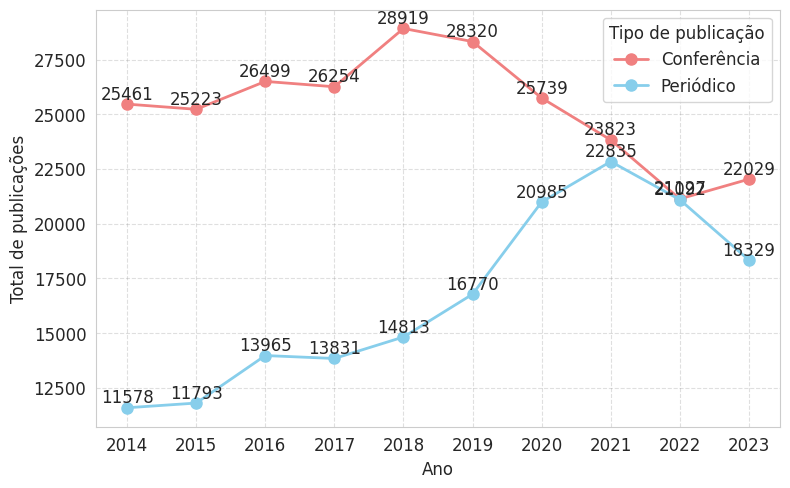

In [7]:
fig_yearly_publications, ax_yearly_publications = visualizer.plot_yearly_publications(
    df_yearly_publications,
    figsize=(8, 5),
    filename="yearly_publications"
)

fig_yearly_publications;

## 3.3. Yearly coauthorship

In [8]:
df_yearly_coauthorships = visualizer.frame_yearly_coauthorships(
    df_productions,
    start_year=2014, end_year=2023,
)

df_yearly_coauthorships

type,CONFERENCIA,PERIODICO
year,,
2014,551860,247682
2015,547049,254596
2016,572798,300944
2017,568094,297116
2018,622282,319105
2019,609776,357484
2020,556067,455711
2021,515108,495499
2022,453641,457097


/home/hellsdeur/Code/lid/ppgcc-coautorias/src/visualization.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_yearly_coauthorships.set_xticklabels(ax_yearly_coauthorships.get_xticklabels(), rotation=0, fontsize=12)
/home/hellsdeur/Code/lid/ppgcc-coautorias/src/visualization.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_yearly_coauthorships.set_yticklabels(ax_yearly_coauthorships.get_yticks().astype(int), fontsize=12)


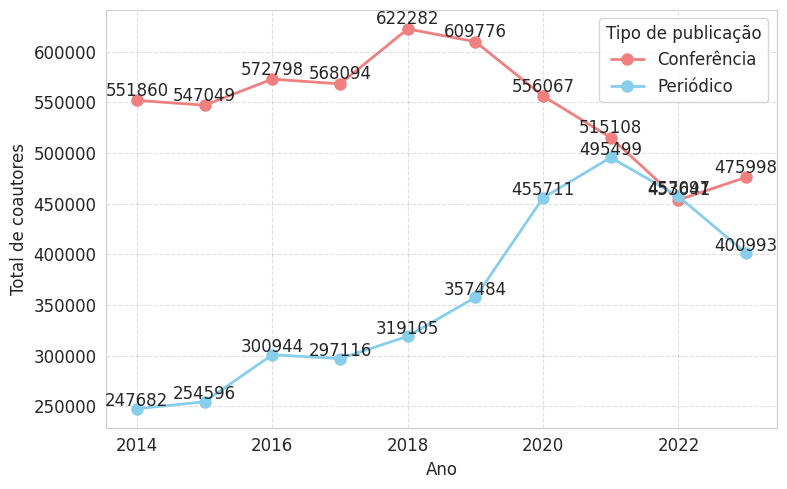

In [9]:
fig_yearly_coauthorships, ax_yearly_coauthorships = visualizer.plot_yearly_coauthorships(
    df_yearly_coauthorships,
    figsize=(8, 5),
    filename="yearly_coauthorships"
)

fig_yearly_coauthorships;

## 3.4. Coauthorships by institution

In [10]:
df_coauthorships_institution = visualizer.frame_coauthorships_institution(
    df_productions,
    institution="UFPA"
)

df_coauthorships_institution

,name,n_coauthorships
24,Rommel Thiago Juca Ramos,85
28,Vinicius Augusto Carvalho de Abreu,81
2,Antonio Jorge Gomes Abelém,80
9,Eduardo Coelho Cerqueira,78
26,Sandro Ronaldo Bezerra Oliveira,78
17,Joao Crisóstomo Weyl Albuquerque Costa,76
25,Ronnie Cley de Oliveira Alves,74
14,Gustavo Pessin,74
3,Bianchi Serique Meiguins,73
5,Carlos Renato Lisboa Francês,73


/home/hellsdeur/Code/lid/ppgcc-coautorias/src/visualization.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="n_coauthorships", y="name", ax=ax_coauthorships_institution, palette="viridis")


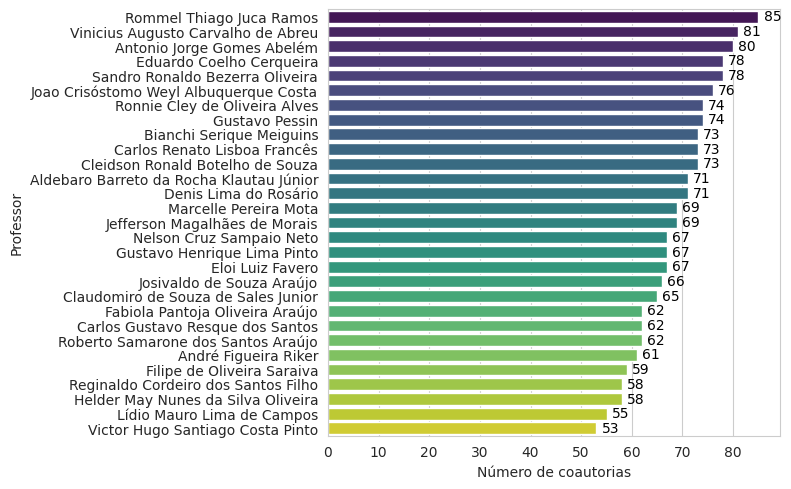

In [11]:
fig_coauthorships_institution, ax_coauthorships_institution = visualizer.plot_coauthorships_institution(
    df_coauthorships_institution,
    figsize=(8, 5),
    filename="coauthorships_institution"
)

fig_coauthorships_institution;

## 3.5. Publications by professor

In [12]:
df_publications_by_researcher = visualizer.publications_by_researcher(
    df_productions,
    institution="UFPA"
)

df_publications_by_researcher

type,name,CONFERENCIA,PERIODICO,total
0,Joao Crisóstomo Weyl Albuquerque Costa,1579,866,2445
1,Rommel Thiago Juca Ramos,9,1916,1925
2,Eduardo Coelho Cerqueira,1081,516,1597
3,Carlos Renato Lisboa Francês,899,548,1447
4,Sandro Ronaldo Bezerra Oliveira,851,216,1067
5,Gustavo Pessin,599,457,1056
6,Aldebaro Barreto da Rocha Klautau Júnior,775,253,1028
7,Denis Lima do Rosário,633,359,992
8,Cleidson Ronald Botelho de Souza,595,201,796
9,Bianchi Serique Meiguins,622,81,703


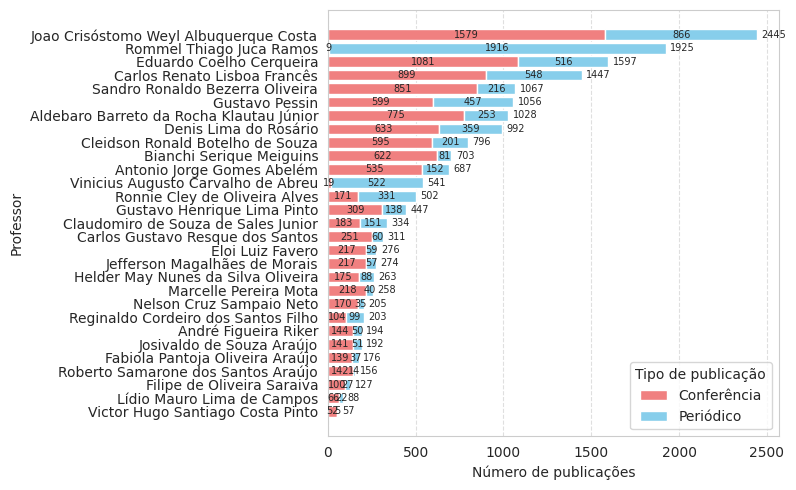

In [13]:
fig_publications_by_researcher, ax_publications_by_researcher = visualizer.plot_publications_by_researcher(
    df_publications_by_researcher,
    figsize=(8, 5),
    filename="publications_by_researcher"
)

fig_publications_by_researcher;

## 3.6. Coauthorship network

In [14]:
researcher_aliases = {}

df_ufpa = df_productions[df_productions['institution'] == 'UFPA']
ufpa_labels = generate_labels(len(df_ufpa['name'].unique()))

for i, name in enumerate(df_ufpa['name'].unique()):
    researcher_aliases[name] = ufpa_labels[i]

In [15]:
df_coauthorship_network = visualizer.frame_coauthorship_network(
    df_productions,
    researcher_aliases=researcher_aliases
)

df_coauthorship_network

,source,target,n_coauthorships
0,A,N,2
1,A,P,2
2,B,J,4
3,B,M,6
4,B,O,16
...,...,...,...
130,β,T,22
132,β,W,6
134,γ,B,2
135,γ,J,32


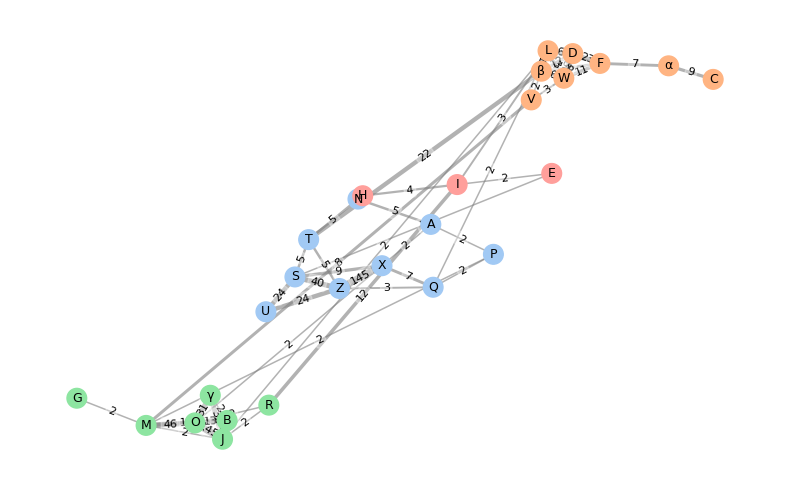

In [16]:
fig_coauthorship_network = visualizer.plot_coauthorship_network(
    df_coauthorship_network,
    figsize=(8, 5),
    filename="coauthorship_network",
)

fig_coauthorship_network;

### 3.6.1. Institution Network

In [17]:
df_institution_relations = visualizer.frame_institution_network(
    df_productions,
    start_year=2014, end_year=2023,
    min_coauthorships=50
)

df_institution_relations

,source,target,n_coauthorships
7,UFPE,UFRPE,113
8,UFSCAR,USP-SC,111
10,UFAC,UFF,102
11,UFMG,UNICAMP,92
14,UFF,UFPB-JP,76
16,UNESP-SJRP,UNICAMP,75
17,UFAL,USP-SC,70
18,UFAL,UFPE,70
19,UFPE,UPE,67
20,UFMG,UFOP,65


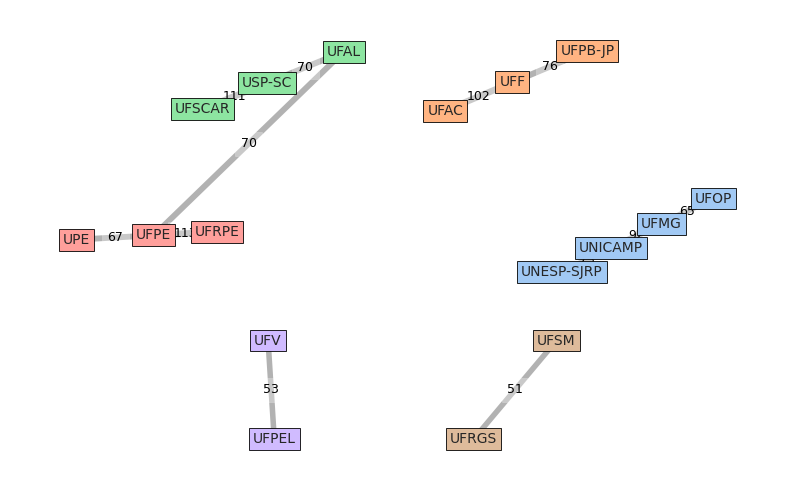

In [18]:
fig_institution_network = visualizer.plot_institution_network(
    df_institution_relations,
    figsize=(8, 5),
    filename="institution_network",
)

## 3.7. Sankey of researchers

In [19]:
visualizer.plot_sankey_researcher(df_coauthorship_network)

## 3.8. Chord of institution coauthorship

In [20]:
df_institution_coauthorship = visualizer.frame_institution_coauthorship(
    df_productions,
    start_year=2014, end_year=2023,
    n_coauthorships=150
)

df_institution_coauthorship

,production_id,institutions,institutions_string
513,819,"[UFV, UFMG]",UFV - UFMG
514,820,"[UFV, UFMG]",UFV - UFMG
515,821,"[UFV, UFMG]",UFV - UFMG
516,822,"[UFV, UFMG]",UFV - UFMG
517,823,"[UFV, UFMG]",UFV - UFMG
...,...,...,...
111234,230914,"[UFRJ-COMP, UFF]",UFRJ-COMP - UFF
111236,230916,"[UFRJ-COMP, UFF]",UFRJ-COMP - UFF
111237,230917,"[UFRJ-COMP, UFF]",UFRJ-COMP - UFF
111238,230918,"[UFRJ-COMP, UFF]",UFRJ-COMP - UFF


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
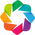

:Chord   [source,target]   (value)

In [21]:
fig_chord_institution = visualizer.plot_chord_institution(
    df_institution_coauthorship,
    width=600, height=600,
    filename="institution_coauthorship_network"
)

fig_chord_institution